In [2]:
import mule as mu
import scanpy as sc
import pandas as pd
import numpy as np
from IPython.display import Image


Import MULE already


In [ ]:
adata  = sc.read_h5ad('/home/jinpucai/Desktop/JP_project/scPurity/cell_subtype/intro/hie_intro.h5ad')
UMI_info = pd.read_csv('/home/jinpucai/Desktop/JP_project/scPurity/cell_subtype/intro/hie_intro.csv',index_col =0)

In [3]:
mu.pre_process.hvg(adata)

AnnData object with n_obs × n_vars = 1160 × 19188
    var: 'highly_variable'

In [4]:
adata = adata[:,adata.var['highly_variable'] == True]

In [5]:
mu.tax.mutually_exclusively_detect_CME(adata)

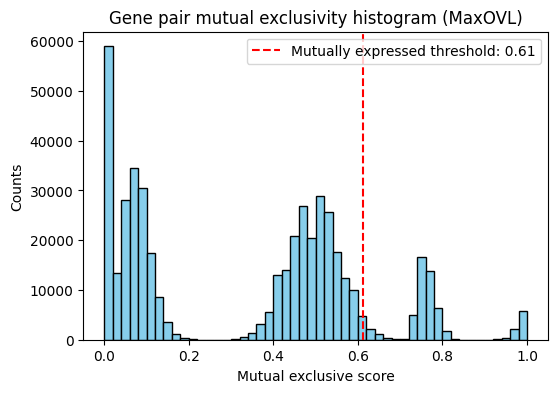

In [6]:
mu.vis.polar_score(adata)

In [7]:
mu.tax.build_opposite_graph(adata, threshold = 0.8)

Build mutually exclusive gene graph
Calculate original graph degree


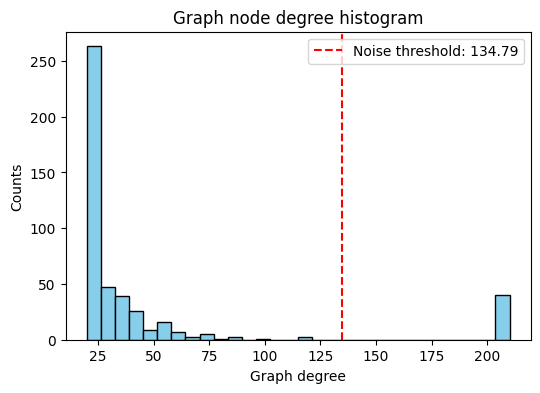

134.7918953489733

In [8]:
mu.vis.graph_degree(adata)

In [44]:
mu.tax.get_subgraph(adata,threshold=50)

Filter low-degree nodes (denoise genes)


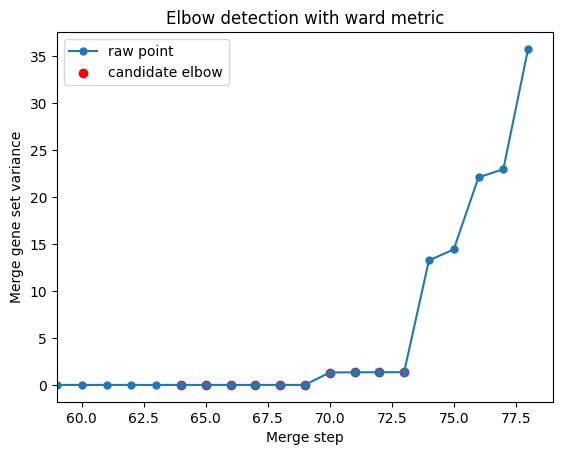

Linkage info (last 20 steps):
59     0.000000
60     0.000000
61     0.000000
62     0.000000
63     0.000000
64     0.000000
65     0.000000
66     0.000000
67     0.000000
68     0.000000
69     0.000000
70     1.322876
71     1.343710
72     1.348400
73     1.359590
74    13.266499
75    14.435956
76    22.118562
77    22.978048
78    35.800272
Name: 2, dtype: float64


In [45]:
mu.vis.merge_strategy(adata)

In [46]:
mu.tax.bipartite_embedding_perm_fast(adata,merge_threshold=20)

plot the opposite filter graph


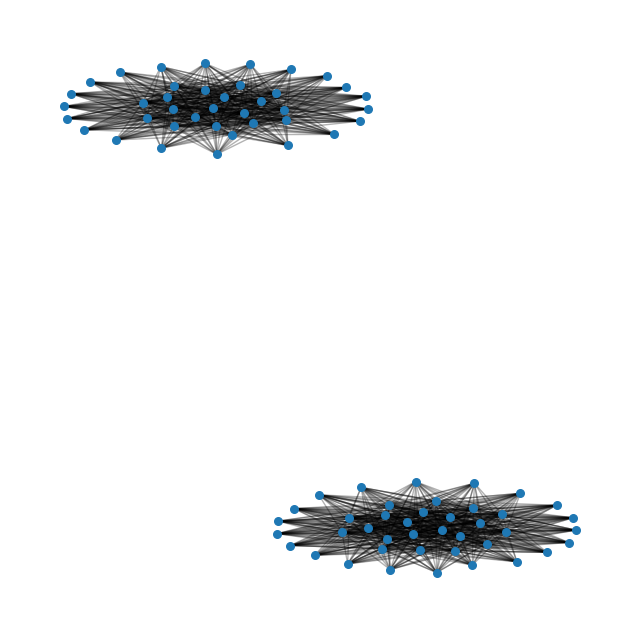

In [47]:
mu.vis.oppo_filter_graph(adata)

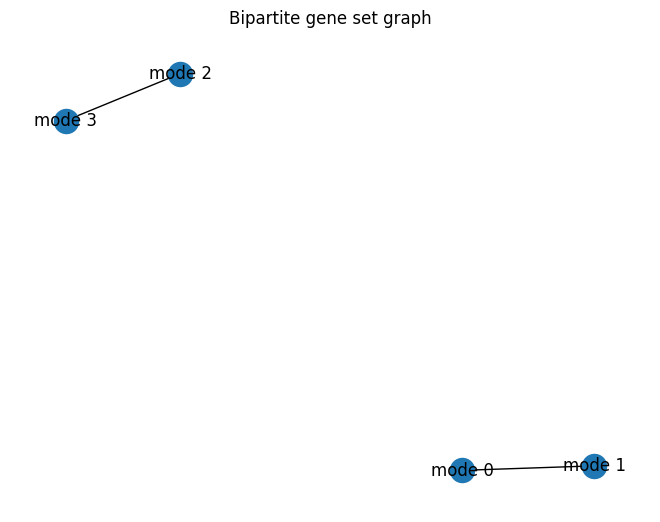

In [48]:
mu.vis.mode_graph(adata)

In [49]:
mu.tax.build_taxonomy_tree(adata)

Create a root marker set
root set
├── mode 0
├── mode 1
├── mode 2
└── mode 3



In [50]:
mu.tax.cal_scpurity_cme_parallel(adata)

Calculate scPurity using CME scores with parallel permutation test
scPurity: 0.808999941099862 p_value: 1.0


In [51]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
mu.tax.mule_umap(adata, ['mode 0', 'mode 1'])

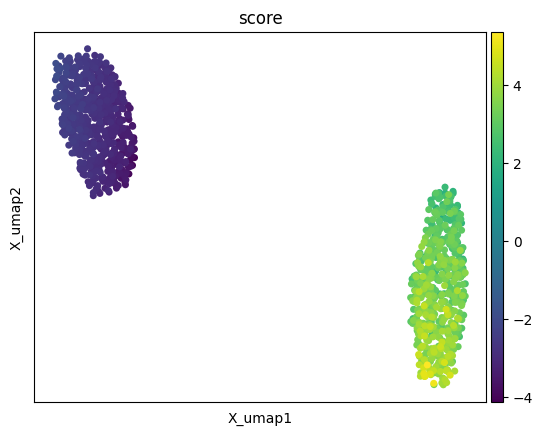

In [56]:
sc.tl.score_genes(adata, gene_list=adata.uns['mule']['mode info']['mode 3'])
sc.pl.embedding(adata, basis='X_umap', color = 'score')

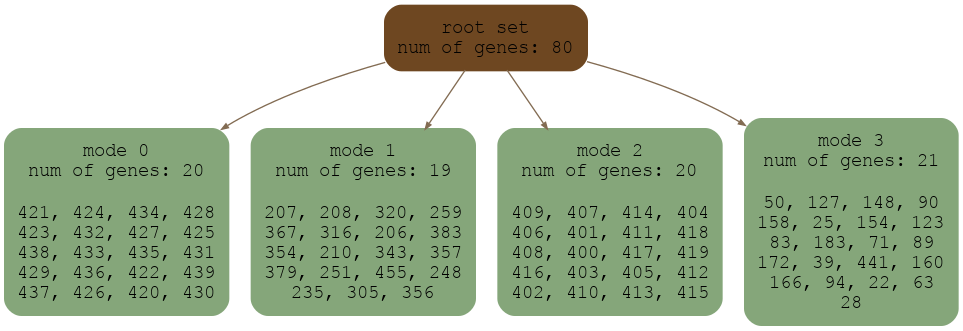

In [53]:
tree = mu.vis.plot_taxonomy_tree(adata)
Image(tree.create_png())